<a href="https://colab.research.google.com/github/sanskruti-1234/Deep-Learning/blob/main/Practical_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
def main():

    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    input_shape = (28, 28)

    num_classes = 10
    y_train_one_hot = to_categorical(y_train, num_classes)
    y_test_one_hot = to_categorical(y_test, num_classes)

    print("Building the neural network model...")
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    print("\nTraining the model...")
    history = model.fit(x_train, y_train_one_hot,
                        epochs=10,
                        batch_size=128,
                        validation_split=0.2,
                        verbose=1)

    print("\nEvaluating the model on the test dataset...")
    test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot, verbose=0)
    print(f"\nTest Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    print("\nPlotting training history...")
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    print("\nMaking predictions on a few test images...")
    predictions = model.predict(x_test)

    indices = np.random.choice(len(x_test), size=5, replace=False)

    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(indices):
        plt.subplot(1, 5, i + 1)
        plt.imshow(x_test[idx], cmap='gray')

        predicted_label = np.argmax(predictions[idx])
        true_label = y_test[idx]

        plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", color='green' if predicted_label == true_label else 'red')
        plt.axis('off')
    plt.suptitle('Sample Predictions', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

TensorFlow is using a CPU.
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Building the neural network model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8652 - loss: 0.4682 - val_accuracy: 0.9649 - val_loss: 0.1151
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9710 - loss: 0.0980 - val_accuracy: 0.9714 - val_loss: 0.0905
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9827 - loss: 0.0563 - val_accuracy: 0.9714 - val_loss: 0.0913
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9888 - loss: 0.0362 - val_accuracy: 0.9732 - val_loss: 0.0869
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9920 - loss: 0.0271 - val_accuracy: 0.9765 - val_loss: 0.0804
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9934 - loss: 0.0213 - val_accuracy: 0.9697 - val_loss: 0.1089
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9940 - loss: 0.0197 - val_accuracy: 0.9775 - val_loss: 0.0884
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9956 

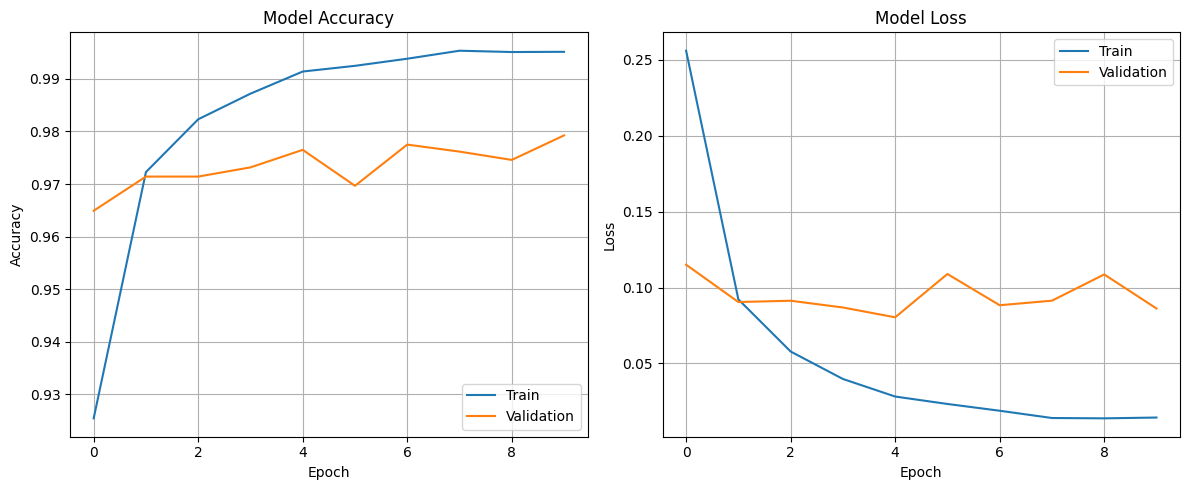


Making predictions on a few test images...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


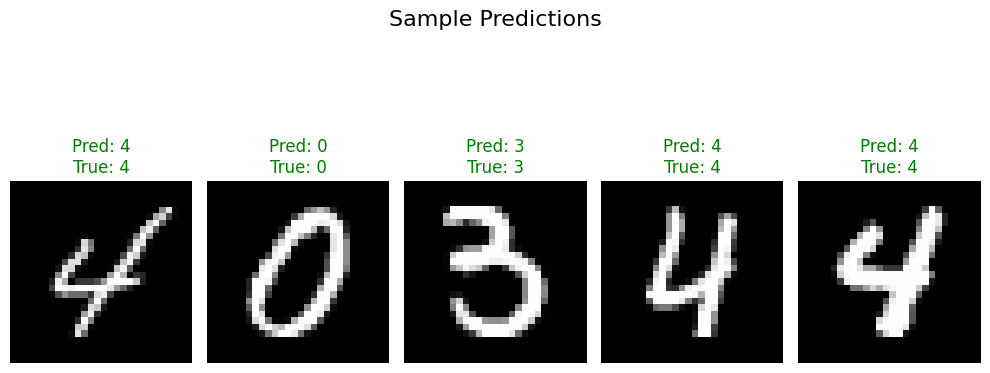

In [4]:
if __name__ == "__main__":

    try:
        if tf.config.list_physical_devices('GPU'):
            print("TensorFlow is using a GPU.")
        else:
            print("TensorFlow is using a CPU.")
        main()
    except Exception as e:
        print(f"An error occurred: {e}")
        print("Please ensure TensorFlow and other required libraries are installed.")
        print("You can install them using: pip install tensorflow matplotlib numpy")
